<a href="https://colab.research.google.com/github/diviramon/PatternRec/blob/main/Lab2/part4_sequential_discriminants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4 Sequential Discriminants

Used Google Colab for this section

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.io import loadmat

In [ ]:
# fix random seed
np.random.seed(42)

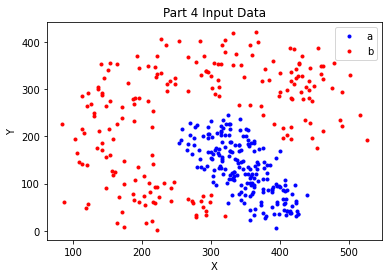

In [ ]:
# load data
mat = loadmat("lab2_3.mat")
a, b = mat['a'].astype("float"), mat['b'].astype("float")
# display data
plt.plot(a[:,0],a[:,1],".", color="blue",label="a")
plt.plot(b[:,0],b[:,1],".", color="red",label="b")
plt.title("Part 4 Input Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
# function to plot decision boundary
def plot_boundary(a, b, classifier, iter=1):
    points = np.concatenate((a,b))
    xmin, ymin = points.min(axis=0)
    xmax, ymax = points.max(axis=0)
    x = np.arange(xmin, xmax)
    y = np.arange(ymin, ymax)
    xx, yy = np.meshgrid(x, y)
    grid = np.stack((xx,yy),axis=2)
    rows,cols,_ = grid.shape
    res_matrix = np.zeros(shape=(rows,cols))
    for i in range(rows):
        for j in range(cols):
          res_matrix[i,j] = classifier(grid[i,j])
    plt.plot(a[:,0],a[:,1],".",color="green")
    plt.plot(b[:,0],b[:,1],".", color="purple")
    plt.contourf(res_matrix,extent=[xmin, xmax, ymin, ymax],cmap="Pastel1")
    plt.title("Sequential Classifer %d Decision Boundary" % iter)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return

In [ ]:
# function to make discriminants
def make_MED(pa, pb):
    def is_a(p):
      return np.linalg.norm(p-pa) < np.linalg.norm(p-pb)
    return is_a

# function to find the discriminants
def find_Gs(a, b, J=None):
    G_list = []
    n_aB_list = []
    n_bA_list = []
    iter = 0
    while a.shape[0] != 0 or b.shape[0] != 0:
      
        if J is not None and len(G_list) == J:
            # stop early because discriminants limit
            return G_list, n_aB_list, n_bA_list

        iter += 1
        # select random points
        p_a = a[np.random.randint(0,a.shape[0])]
        p_b = b[np.random.randint(0,b.shape[0])]

        # MED discriminant
        is_a = make_MED(p_a, p_b)

        # classify
        results_a = np.array([is_a(p) for p in a])
        results_b = np.array([not is_a(p) for p in b])
        n_aB = a.shape[0] - np.count_nonzero(results_a)
        n_bA = b.shape[0] - np.count_nonzero(results_b)

        # check is a good classifier
        if n_aB == 0  or n_bA == 0:
            G_list.append(is_a)
            n_aB_list.append(n_aB)
            n_bA_list.append(n_bA)
            if n_aB == 0  and n_bA == 0: # we are done
                break
            elif n_aB == 0:
                b = b[np.invert(results_b)] # remove points from B
            else:
                a = a[np.invert(results_a)] # remove points from A
    print("Number of iterations needed: ", iter)
    return G_list, n_aB_list, n_bA_list

In [ ]:
# function to make the classifier
def seq_classifier(G_list, n_aB_list, n_bA_list):
    def classifier(x):
        for (G, n_aB, n_bA) in zip(G_list, n_aB_list, n_bA_list):
            if G(x) and n_bA == 0: # classify as A
                return 1
            elif not G(x) and n_aB == 0: # classify as B
                return 0
        return 2 # not classified
    return classifier

### Train 3 Sequential Classifiers

Number of iterations needed:  16


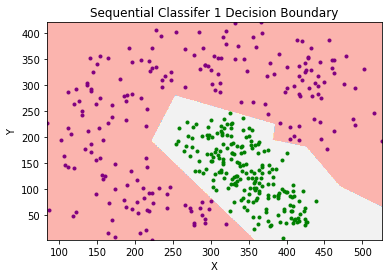

Number of iterations needed:  23


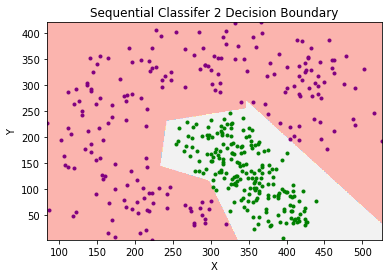

Number of iterations needed:  118


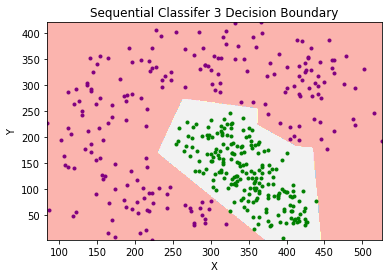

In [ ]:
for i in range(3):
    classifier = seq_classifier(*find_Gs(a,b))
    plot_boundary(a,b,classifier,i+1)

### Limit Number of Classifiers

In [ ]:
# function to calculate the error rate
def calc_error(a,b,classifier):
    TP = np.sum([classifier(p) is 1 for p in a])
    TN = np.sum([classifier(p) is 0 for p in b])
    return 1 - (TP + TN)/(len(a) + len(b))

In [ ]:
# run experiments
num_experiments = 20
J_range = 5
errors = np.empty((J_range,num_experiments))
for J in range(J_range):
    for i in range(num_experiments):
        classifier = seq_classifier(*find_Gs(a,b,J+1))
        errors[J,i] = calc_error(a,b,classifier)

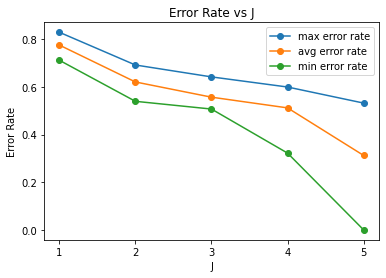

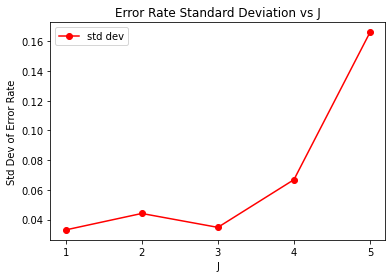

In [ ]:
# calculate error statistics
avg_errors = errors.mean(axis=1)
max_errors = errors.max(axis=1)
min_errors = errors.min(axis=1)
std_deviations = errors.std(axis=1)

# plot error statistics
j = range(1,J_range+1)
plt.plot(j,max_errors,label="max error rate",marker="o")
plt.plot(j,avg_errors,label="avg error rate",marker="o")
plt.plot(j,min_errors,label="min error rate",marker="o")
plt.xticks(j)
plt.title("Error Rate vs J")
plt.xlabel("J")
plt.ylabel("Error Rate")
plt.legend()
plt.show()
print("")
plt.plot(j,std_deviations,label="std dev",marker="o",color="r")
plt.xticks(j)
plt.title("Error Rate Standard Deviation vs J")
plt.xlabel("J")
plt.ylabel("Std Dev of Error Rate")
plt.legend()
plt.show()

### Extra

In [ ]:
# extra experiments
num_experiments = 20
J_range = 10
errors = np.empty((J_range,num_experiments))
for J in range(J_range):
    for i in range(num_experiments):
        classifier = seq_classifier(*find_Gs(a,b,J+1))
        errors[J,i] = calc_error(a,b,classifier)

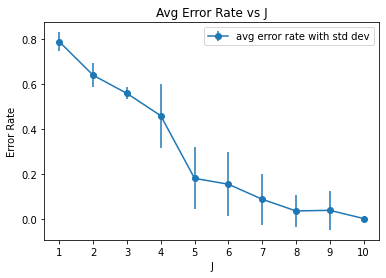

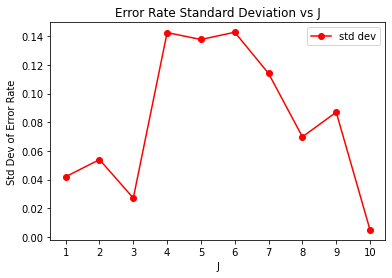

In [ ]:
# calculate error statistics
avg_errors = errors.mean(axis=1)
std_deviations = errors.std(axis=1)

# plot error statistics
j = range(1,J_range+1)
plt.errorbar(j,avg_errors,std_deviations,label="avg error rate with std dev",marker="o")
plt.xticks(j)
plt.title("Avg Error Rate vs J")
plt.xlabel("J")
plt.ylabel("Error Rate")
plt.legend()
plt.show()
print("")
plt.plot(j,std_deviations,label="std dev",marker="o",color="r")
plt.xticks(j)
plt.title("Error Rate Standard Deviation vs J")
plt.xlabel("J")
plt.ylabel("Std Dev of Error Rate")
plt.legend()
plt.show()

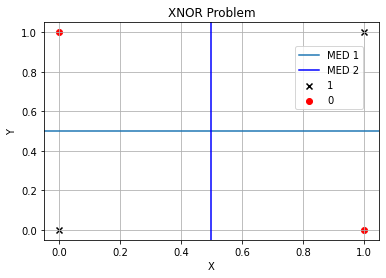

In [ ]:
# plot XNOR problem
plt.scatter(0,0,marker="x",color="black",label="1")
plt.scatter(1,1,marker="x",color="black")
plt.scatter(0,1,marker="o",color="red",label="0")
plt.scatter(1,0,marker="o",color="red")
plt.axhline(y=0.5,label="MED 1")
plt.axvline(x=0.5,label="MED 2",color="b")
plt.title("XNOR Problem")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend(loc=(0.75,0.6))
plt.show()